# SEMANA TEC TS1001S Convolucion/Padding


Aqui se ilustra la convolucion. Este tutorial consta de tres pasos.

1. Descargar una imagen
2. Dependencias
3. Aplicar una convolucion



## Descar de Imagen

In [12]:
!gdown https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN


Downloading...
From: https://drive.google.com/uc?id=1cJ_XzTbiIKiuMCraz0ZSgGnByiOOxpYN
To: /content/sudoku.png
100% 39.4k/39.4k [00:00<00:00, 40.6MB/s]


In [13]:
!ls -ltr
!pwd

total 44
drwxr-xr-x 1 root root  4096 Mar  9 14:48 sample_data
-rw-r--r-- 1 root root 39407 Mar 24 18:33 sudoku.png
/content


## Dependencias

In [14]:
import matplotlib.pyplot as plt
import numpy
from PIL import Image
from scipy import ndimage

## Convolucion

Aqui se abre y normaliza la imagen

In [15]:
Is = Image.open('sudoku.png');
I = Is.convert('L');
I = numpy.asarray(I);
I = I / 255.0;

Seleccionar los kernels y aplicar la convolucion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


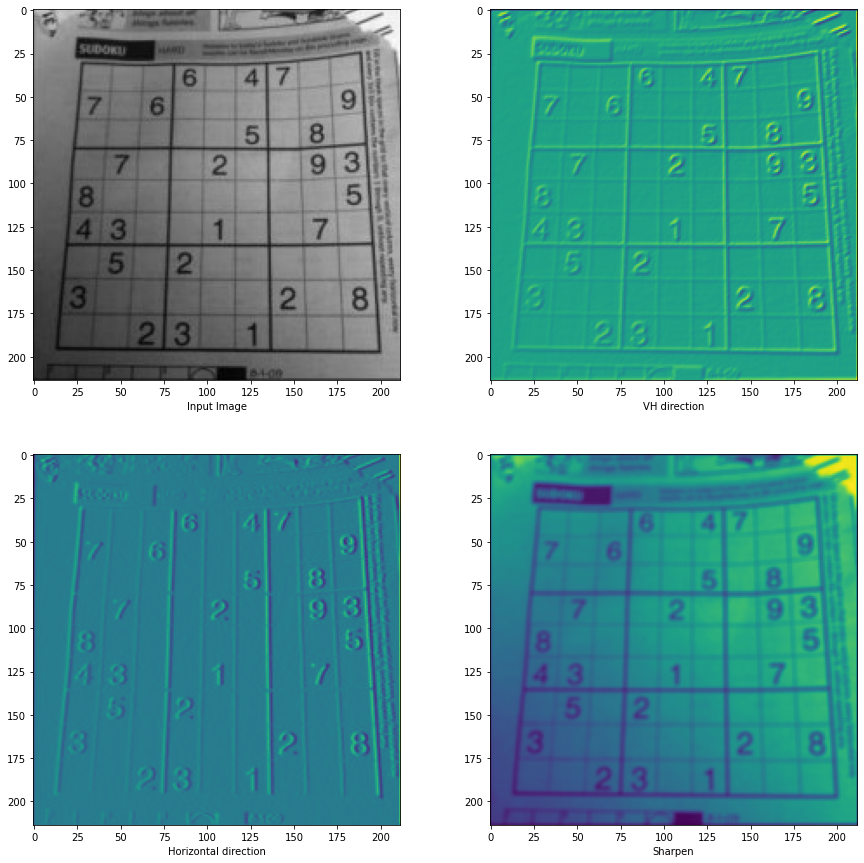

In [28]:
k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])

'''
1 -1 1
-1 4 -1
 1 -1 1
'''

k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])

'''
 0 0 0
-1 0 1
 0 0 0
'''


k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

'''
 0 -1 0
 0  0 0
 0  1 0
'''
def create_k():
  A = numpy.zeros((3,3))
  for x in range (-1, 2):
    for y in range (-1, 2):
      A[x][y] = numpy.exp(-1 * (0.5 * (x + y) ** 2) / 2)
  return A


k3 = numpy.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
'''
 0 -1 0
 -1  5 -1
 0  -1 0
'''

def k4():
  A = numpy.zeros((5,5))
  for x in range (-1, 4):
    for y in range (-1, 4):
      A[x][y] = ((x + y) ** 2)
  return A

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k3, mode='constant', cval=0.0)
J3 = ndimage.convolve(I, create_k(), mode='constant', cval=0.0)

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(2,2,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(2,2,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')

plt.subplot(2,2,4)
plt.imshow(J2)
plt.xlabel('Sharpen direction')

plt.subplot(2,2,4)
plt.imshow(J3)
plt.xlabel('Sharpen')


plt.grid(False)
plt.show()

## Padding

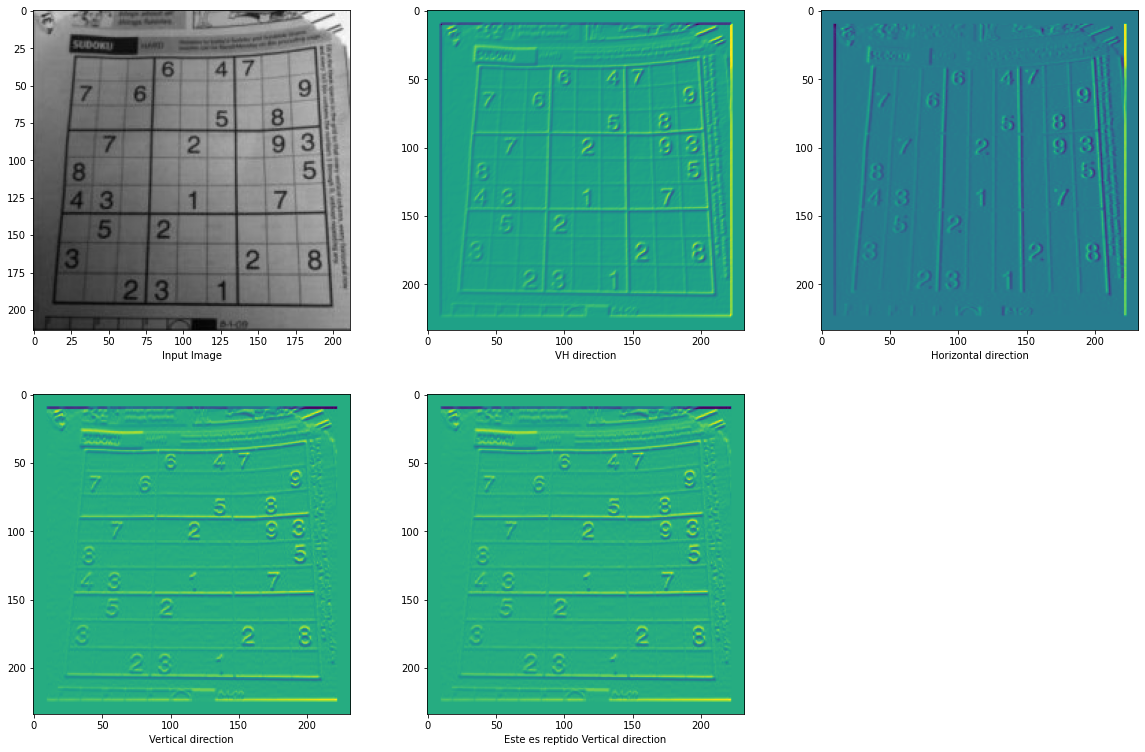

In [ ]:
Is = Image.open('sudoku.png'); # imagen del sudo
I = Is.convert('L'); # se convierte a escala de grises
I = numpy.asarray(I); # conversion numerica para poder operar de 0-1
I = I / 255.0; # normalizacion 0 - 1

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

I = numpy.pad(I, 10, pad_with, padder=0)

M = kernel(sigma, alpha, I, )

kM = numpy.array(M)

k0 = numpy.array([[0,-1,0],[-1,0,1],[0,1,0]])
k1 = numpy.array([[0,0,0],[-1,0,1],[0,0,0]])
k2 = numpy.array([[0,-1,0],[0,0,0],[0,1,0]])

J0 = ndimage.convolve(I, k0, mode='constant', cval=0.0)
J1 = ndimage.convolve(I, k1, mode='constant', cval=0.0)
J2 = ndimage.convolve(I, k2, mode='constant', cval=0.0)

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.imshow(Is)
plt.xlabel('Input Image')

plt.subplot(3,3,2)
plt.imshow(J0)
plt.xlabel('VH direction')

plt.subplot(3,3,3)
plt.imshow(J1)
plt.xlabel('Horizontal direction')

plt.subplot(3,3,4)
plt.imshow(J2)
plt.xlabel('Vertical direction')

plt.subplot(3,3,5)
plt.imshow(J2)
plt.xlabel('Este es reptido Vertical direction')


#plt.grid(False)
plt.show()